# OBPM DBPM method

Importing dependencies

In [ ]:
%pip install opendatasets
import warnings
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import opendatasets as od



warnings.filterwarnings('ignore')
np.random.seed(2603)
pd.set_option("display.max_columns", None)
# # # kaggleenc = {"iskarthik":"49fbeae42d857429c45eee6262a2380"} #at the end of the key you need to add a as an extra character


In [ ]:
dataUrl = 'https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset?select=male_players.csv'
od.download(dataUrl)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iskarthik
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset


100%|██████████| 1.58G/1.58G [00:21<00:00, 80.0MB/s]


In [ ]:
data = pd.read_csv('/content/fifa-23-complete-player-dataset/male_players (legacy).csv')
print('Raw dataset:')
print(data.shape)
print('unique players ids:', len(data['player_id'].unique()))
print('unique clubs ids:', len(data['club_team_id'].unique()))
print('unique players urls:', len(data['player_url'].unique()))
print('unique players long names:', len(data['long_name'].unique()))

Raw dataset:
(161583, 110)
unique players ids: 49699
unique clubs ids: 1056
unique players urls: 161583
unique players long names: 50360


In [ ]:
columns_to_keep = [
    'player_id', 'fifa_version', 'short_name', 'long_name', 'player_positions',
    'overall', 'potential', 'value_eur', 'wage_eur',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'age', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level',
    'club_team_id', 'club_name',
    'nationality_id', 'nationality_name', 'international_reputation']

data_cleaned = data[columns_to_keep]
data_cleaned.head()

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,pace,shooting,passing,dribbling,defending,physic,age,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,nationality_id,nationality_name,international_reputation
0,158023,15,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,93.0,89.0,86.0,96.0,27.0,63.0,27,169,67,53.0,La Liga,1.0,241.0,FC Barcelona,52,Argentina,5
1,20801,15,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,93.0,93.0,81.0,91.0,32.0,79.0,29,185,80,53.0,La Liga,1.0,243.0,Real Madrid CF,38,Portugal,5
2,9014,15,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,93.0,86.0,83.0,92.0,32.0,64.0,30,180,80,19.0,Bundesliga,1.0,21.0,FC Bayern München,34,Netherlands,5
3,41236,15,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,76.0,91.0,81.0,86.0,34.0,86.0,32,195,95,16.0,Ligue 1,1.0,73.0,Paris Saint-Germain,46,Sweden,5
4,167495,15,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,28,193,92,19.0,Bundesliga,1.0,21.0,FC Bayern München,21,Germany,5


In [ ]:
data_cleaned['player_positions'] = data_cleaned['player_positions'].str.split(', ')
data_cleaned = data_cleaned.explode('player_positions')
data_cleaned.sort_values(by = 'player_positions', ascending = True, inplace=True)
data_cleaned.reset_index(inplace = True, drop = True)
data_cleaned.dropna(inplace=True)
print(len(data_cleaned))
data_cleaned.player_positions.value_counts()



239169


,count
player_positions,
CM,33075
CB,32213
ST,28580
CDM,23451
LM,21060
RM,20587
CAM,19209
RB,17919
LB,17566


In [ ]:
data_cleaned.head(5)

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,pace,shooting,passing,dribbling,defending,physic,age,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,nationality_id,nationality_name,international_reputation
0,223231,21,F. Tănase,Florin Lucian Tănase,CAM,71,75,2600000.0,11000.0,77.0,68.0,70.0,73.0,54.0,63.0,25,185,71,330.0,Liga 1,1.0,100761.0,FCSB (Steaua),39,Romania,1
1,193461,19,Fredy,Alfredo Kulembe Ribeiro,CAM,69,69,1100000.0,5000.0,90.0,62.0,62.0,72.0,24.0,54.0,28,170,68,308.0,Liga Portugal,1.0,1889.0,Belenenses SAD,98,Angola,1
2,221120,15,R. Vloet,Rai Vloet,CAM,63,75,275000.0,6000.0,65.0,62.0,59.0,62.0,29.0,64.0,19,187,76,10.0,Eredivisie,1.0,247.0,PSV,34,Netherlands,1
3,244539,21,H. Massoudi,Hamza Massoudi,CAM,61,72,725000.0,2000.0,68.0,53.0,53.0,72.0,31.0,43.0,20,175,67,4.0,Jupiler Pro League,1.0,680.0,Sint-Truidense VV,7,Belgium,1
4,244488,21,S. Arab,Saïd Arab,CAM,61,72,700000.0,1000.0,73.0,53.0,57.0,68.0,43.0,60.0,19,178,73,17.0,Ligue 2,2.0,111817.0,Paris FC,18,France,1


In [ ]:
data_cleaned = data_cleaned[~data_cleaned['player_positions'].str.contains('GK', na=False)]

# Step 2: Define function to categorize positions
def categorize_position(position):
    if 'CB' in position or 'LB' in position or 'RB' in position  or 'LWB' in position or 'RWB' in position:
        return 'Defender'
    elif 'CM' in position or 'CAM' in position or 'LM' in position or 'RM' in position or 'CDM' in position:
        return 'Midfielder'
    elif 'ST' in position or 'CF' in position or 'SS' in position or 'LW' in position or 'RW' in position :
        return 'Forward'
    else:
        return 'Other'

# Step 3: Apply the categorization function to create a new column
data_cleaned['position_category'] = data_cleaned['player_positions'].apply(categorize_position)

# Display the first few rows of the processed data
data_cleaned[['player_id', 'long_name', 'player_positions', 'position_category','fifa_version', 'age']].drop_duplicates(inplace=True)
data_filtered = data_cleaned['position_category'].unique()

In [ ]:
# Descriptive statistics for continuous columns
descriptive_stats = data_cleaned[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'age', 'value_eur']].describe()

# Frequency count for categorical columns (e.g., player_positions, position_categories)
position_counts = data_cleaned['position_category'].value_counts()

print(position_counts)
descriptive_stats


position_category
Midfielder    117382
Defender       72670
Forward        49116
Name: count, dtype: int64


,pace,shooting,passing,dribbling,defending,physic,age,value_eur
count,239168.000000,239168.000000,239168.000000,239168.000000,239168.000000,239168.000000,239168.000000,2.391680e+05
mean,69.161941,53.789529,58.582160,63.635026,50.881786,64.540566,25.075892,2.553221e+06
std,10.793893,13.368775,10.104945,9.815711,16.240391,9.624950,4.413294,6.248865e+06
min,21.000000,14.000000,20.000000,22.000000,14.000000,27.000000,16.000000,1.000000e+03
25%,63.000000,45.000000,52.000000,58.000000,36.000000,58.000000,22.000000,4.000000e+05
50%,70.000000,56.000000,59.000000,65.000000,55.000000,66.000000,25.000000,8.250000e+05
75%,76.000000,64.000000,65.000000,70.000000,64.000000,72.000000,28.000000,2.100000e+06
max,97.000000,94.000000,93.000000,96.000000,91.000000,92.000000,39.000000,1.940000e+08


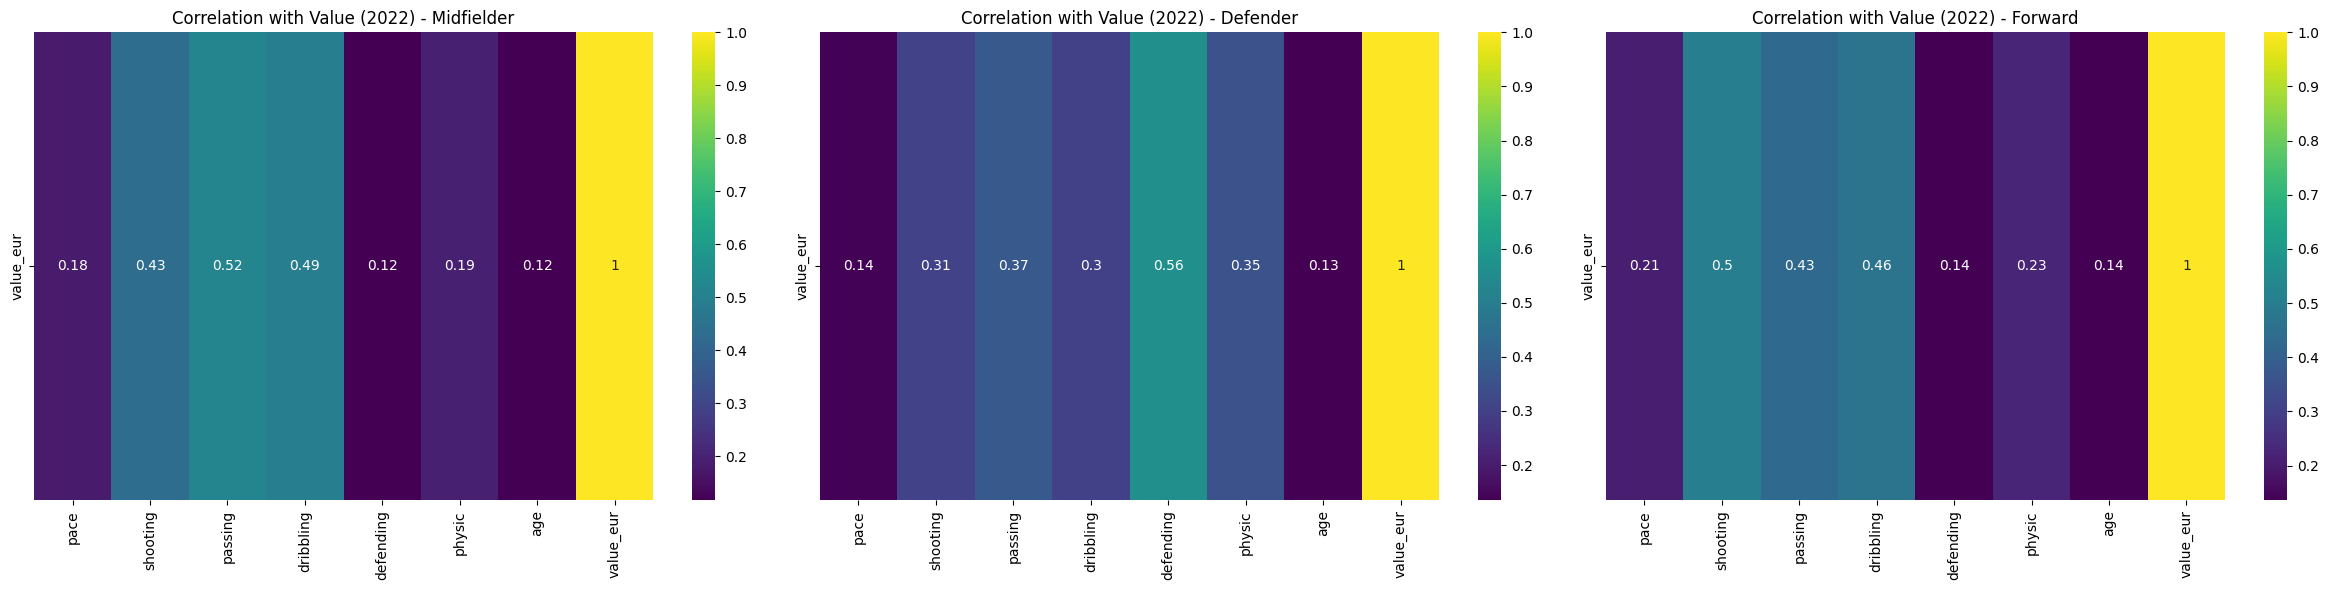

In [ ]:
data_2015 = data_cleaned[data_cleaned['fifa_version'] == 15]
data_2022 = data_cleaned[data_cleaned['fifa_version'] == 22]
play_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'age', 'value_eur']
positions = data_2022['player_positions'].unique()


# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # One subplot per position category

# Position categories to iterate through
position_categories = ['Midfielder', 'Defender', 'Forward']

# Iterate through position categories and plot the correlation matrices
for i, position in enumerate(position_categories):
    # Filter data for the current position category
    pos_data = data_2015[data_2015['position_category'] == position]

    # Compute correlation matrix for the selected columns
    corr_matrix = pos_data[play_attributes].corr()

    # Focus on the correlation with 'value_eur'
    value_corr = corr_matrix[['value_eur']]

    # Plot heatmap for the current position category
    sns.heatmap(value_corr.T, annot=True, cmap='viridis',ax=axes[i])
    axes[i].set_title(f"Correlation with Value (2022) - {position}")

# Adjust layout
plt.tight_layout()
plt.show()


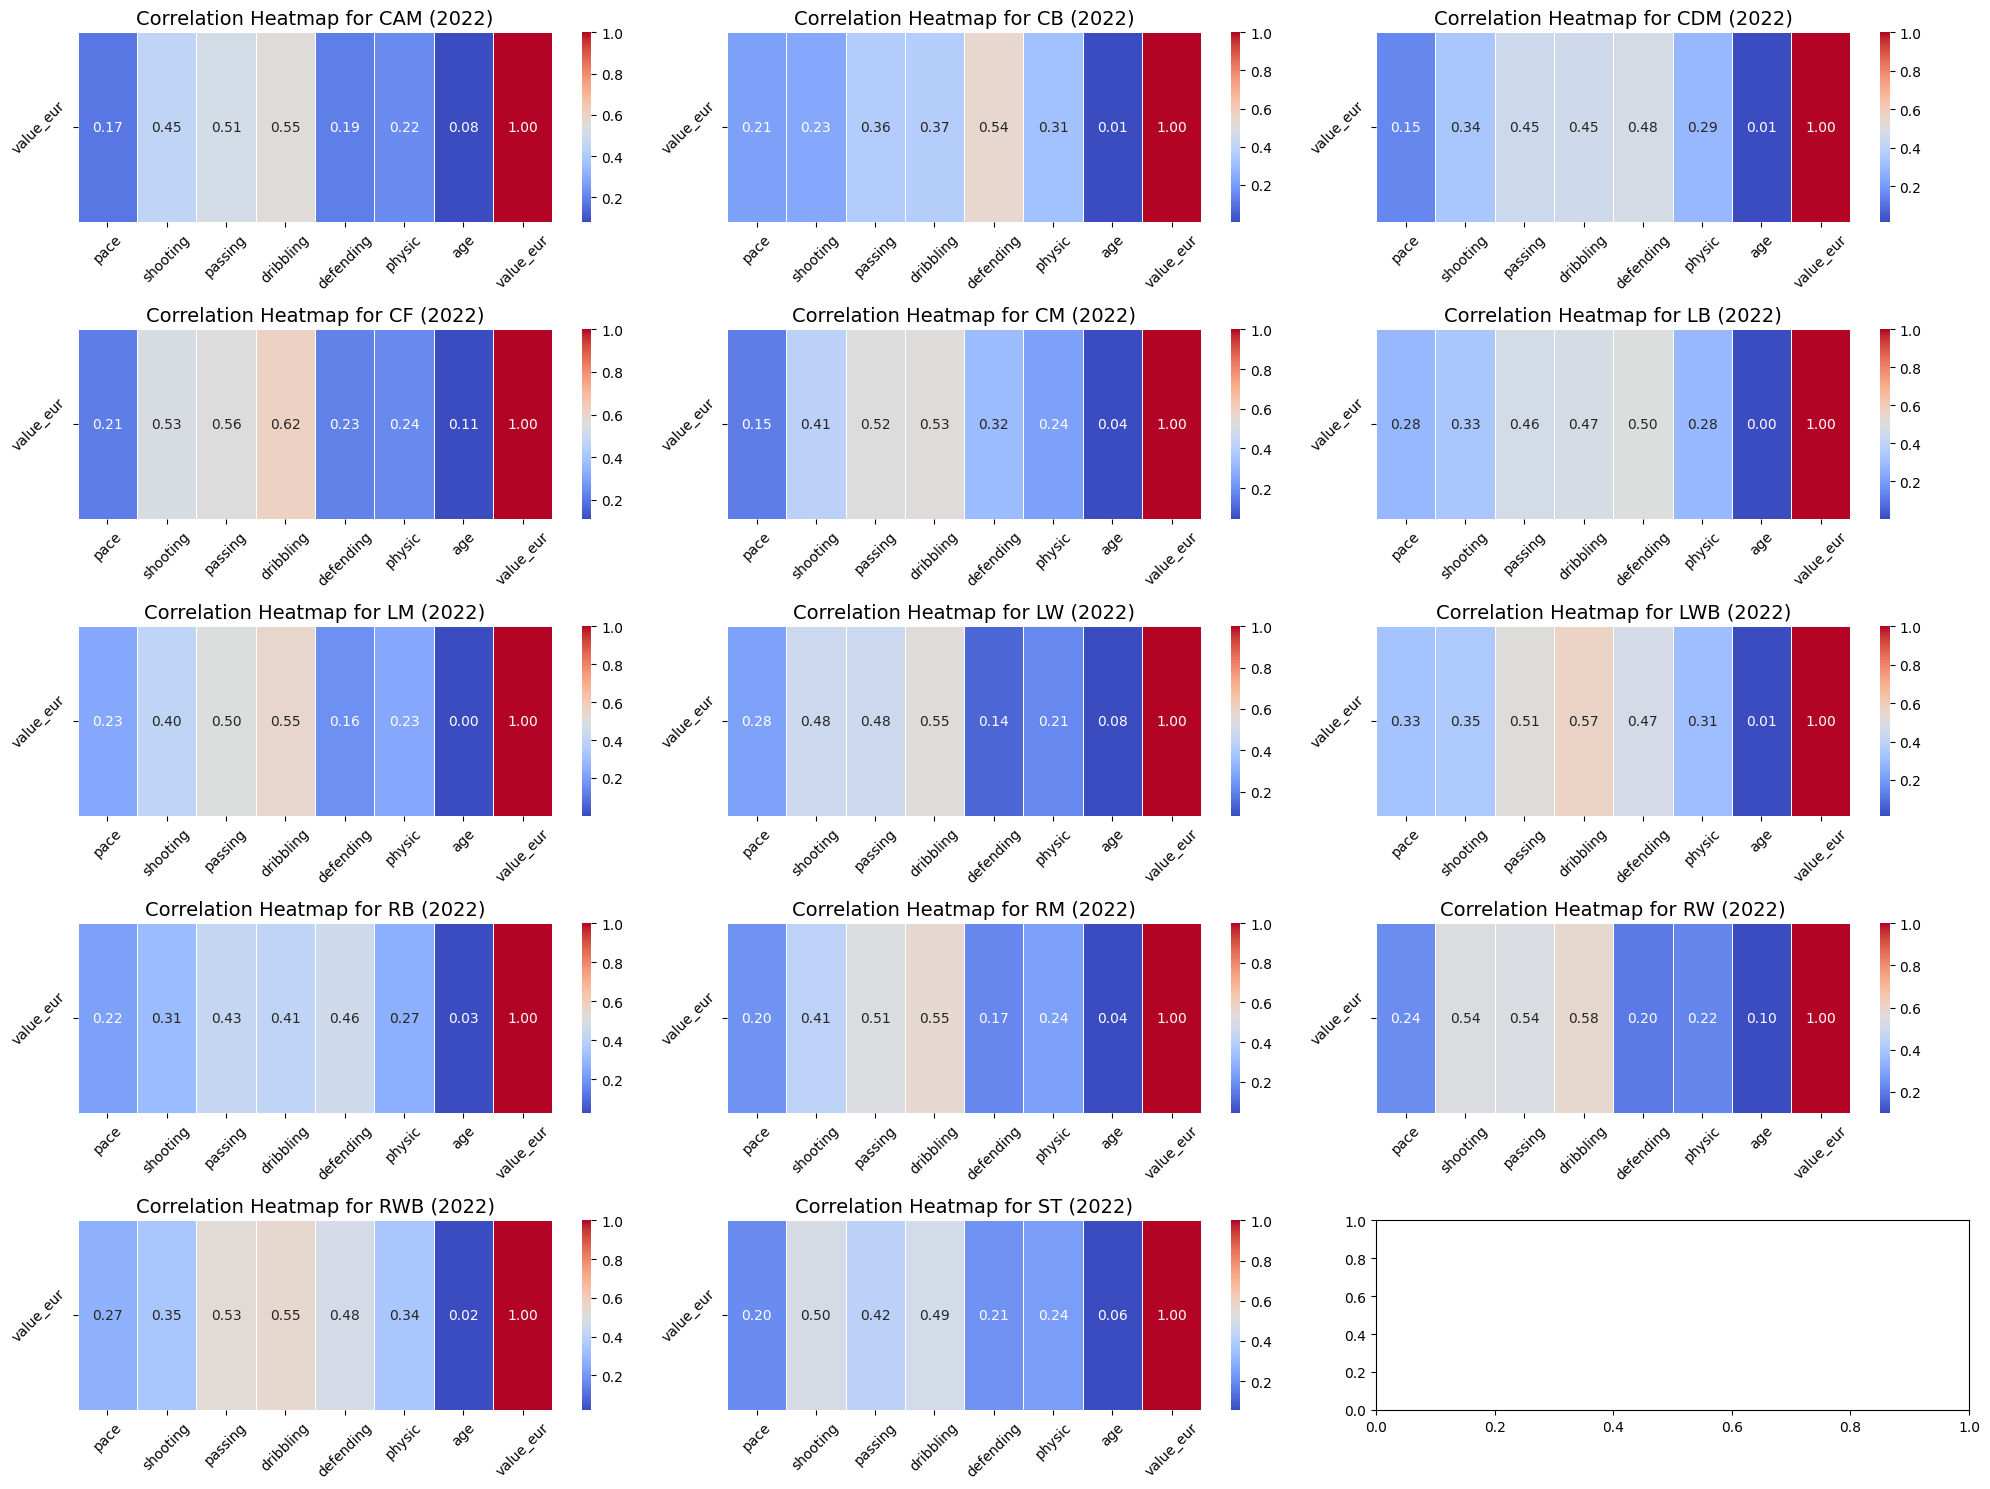

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 15))
axes = axes.flatten()  # Flatten to easily loop over

for idx, position in enumerate(positions):
    position_data = data_2022[data_2022['player_positions'] == position]

    # Calculate correlation matrix for this position
    corr_matrix = position_data[play_attributes].corr()  # Including value_eur

    # Plot the heatmap
    sns.heatmap(corr_matrix[-1:], annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
                ax=axes[idx], linewidths=0.5)
    axes[idx].set_title(f"Correlation Heatmap for {position} (2022)", fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].tick_params(axis='y', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:

play_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

obpm_weights = {}
dbpm_weights = {}
obpm_norm = {}
dbpm_norm = {}

for position in data_cleaned['player_positions'].unique():

    position_data = data_cleaned[data_cleaned['player_positions'] == position]

    corr_matrix = position_data[play_attributes + ['value_eur']].corr()

    value_corr = corr_matrix['value_eur'].drop('value_eur')

    obpm_attributes = ['pace', 'shooting', 'dribbling', 'passing']
    dbpm_attributes = ['defending', 'physic', 'pace']

    obpm_weight_raw = value_corr[obpm_attributes]
    dbpm_weight_raw = value_corr[dbpm_attributes]

    obpm_weight_normalized = obpm_weight_raw / obpm_weight_raw.sum()
    dbpm_weight_normalized = dbpm_weight_raw / dbpm_weight_raw.sum()

    obpm_weights[position] = obpm_weight_raw.round(2)
    dbpm_weights[position] = dbpm_weight_raw.round(2)

    obpm_norm[position] = obpm_weight_normalized.round(2)
    dbpm_norm[position] = dbpm_weight_normalized.round(2)

OBPM = pd.DataFrame(obpm_weights)
DBPM = pd.DataFrame(dbpm_weights)

OBPM_N = pd.DataFrame(obpm_norm)
DBPM_N = pd.DataFrame(dbpm_norm)

OBPM


,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
pace,0.18,0.18,0.13,0.25,0.14,0.24,0.23,0.26,0.27,0.22,0.21,0.25,0.27,0.20
shooting,0.47,0.25,0.37,0.53,0.43,0.33,0.43,0.50,0.37,0.30,0.45,0.53,0.32,0.52
dribbling,0.55,0.36,0.47,0.58,0.53,0.44,0.55,0.56,0.55,0.40,0.56,0.58,0.53,0.49
passing,0.52,0.36,0.47,0.52,0.53,0.44,0.51,0.50,0.52,0.43,0.53,0.54,0.51,0.44


In [ ]:
OBPM_N

,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
pace,0.10,0.16,0.09,0.13,0.09,0.17,0.13,0.14,0.16,0.16,0.12,0.13,0.16,0.12
shooting,0.27,0.22,0.26,0.28,0.26,0.23,0.25,0.28,0.22,0.22,0.26,0.28,0.20,0.32
dribbling,0.32,0.31,0.33,0.31,0.33,0.30,0.32,0.31,0.32,0.30,0.32,0.30,0.33,0.30
passing,0.30,0.31,0.33,0.28,0.33,0.31,0.29,0.28,0.30,0.31,0.30,0.28,0.31,0.27


In [ ]:
DBPM

,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
defending,0.18,0.57,0.46,0.25,0.32,0.48,0.11,0.13,0.46,0.46,0.14,0.18,0.45,0.21
physic,0.22,0.33,0.27,0.21,0.24,0.28,0.20,0.21,0.32,0.27,0.20,0.23,0.32,0.25
pace,0.18,0.18,0.13,0.25,0.14,0.24,0.23,0.26,0.27,0.22,0.21,0.25,0.27,0.20


In [ ]:
DBPM_N

,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
defending,0.31,0.53,0.53,0.35,0.46,0.47,0.21,0.22,0.44,0.49,0.25,0.27,0.43,0.32
physic,0.38,0.31,0.32,0.30,0.34,0.28,0.37,0.35,0.30,0.28,0.37,0.34,0.31,0.38
pace,0.30,0.17,0.15,0.35,0.20,0.24,0.42,0.43,0.26,0.23,0.38,0.39,0.26,0.30


In [ ]:
import numpy as np
import pandas as pd

# List of player attributes
o_play_attributes = ['pace', 'shooting', 'passing', 'dribbling']
d_play_attributes = ['defending', 'physic', 'pace']

# Initialize dictionaries to store the OBPM and DBPM calculations
obpm_values = []
dbpm_values = []

# Loop through each player (assuming `data_cleaned` contains the player data)
for index, row in data_2022.iterrows():
    # Get the player position (could be multiple positions, so we handle that)
    positions = row['player_positions'].split(', ')  # Assuming multiple positions are stored as a comma-separated string
    player_obpm = 0
    player_dbpm = 0

    # Loop over positions for each player
    for position in positions:
        # Get the OBPM and DBPM weights for the position from the DataFrames (OBPM_N and DBPM_N)
        try:
            position_obpm_weights = OBPM_N.loc[:, position]
            position_dbpm_weights = DBPM_N.loc[:, position]

            # Calculate the weighted sum for OBPM and DBPM
            obpm = np.dot(position_obpm_weights, row[o_play_attributes])  # Weighted sum for OBPM
            dbpm = np.dot(position_dbpm_weights, row[d_play_attributes])  # Weighted sum for DBPM

            # Accumulate the results for the player
            player_obpm += obpm
            player_dbpm += dbpm
        except KeyError:
            continue  # Skip the position if it's not found in OBPM/DBPM weights

    # Store the calculated values for the player
    obpm_values.append(player_obpm)
    dbpm_values.append(player_dbpm)

# Add the calculated OBPM and DBPM values to the dataframe
data_2022['OBPM'] = obpm_values
data_2022['DBPM'] = dbpm_values


In [ ]:
data_short = (
    data_2022[['long_name', 'DBPM', 'OBPM', 'player_positions', 'value_eur', 'age', 'overall', 'potential']]
    .groupby('long_name')
    .agg({
        'DBPM': 'mean',  # Example aggregation - adjust as needed
        'OBPM': 'mean',  # Example aggregation - adjust as needed
        'player_positions': 'first',  # Choose the first position as an example
        'value_eur': 'mean',  # Average value
        'age': 'mean',  # Average age
        'potential': 'mean'  # Average potential
    })
    .reset_index()
    .sort_values(['OBPM', 'DBPM'], ascending=False)
)
data_short

,long_name,DBPM,OBPM,player_positions,value_eur,age,potential
9284,Lionel Andrés Messi Cuccittini,62.220,91.640,CF,78000000.0,34.0,93.0
8905,Kylian Mbappé Lottin,73.230,88.710,LW,194000000.0,22.0,95.0
2992,Cristiano Ronaldo dos Santos Aveiro,68.310,88.110,LW,45000000.0,36.0,91.0
11619,Neymar da Silva Santos Júnior,66.015,88.095,CAM,129000000.0,29.0,91.0
8632,Kevin De Bruyne,71.720,87.955,CAM,125500000.0,30.0,91.0
...,...,...,...,...,...,...,...
4519,Ethan Bartlow,56.380,31.320,CB,120000.0,21.0,61.0
15716,Yeon Soo Kim,58.800,31.050,CB,140000.0,27.0,57.0
16124,刘佳燊,59.780,30.610,CB,90000.0,29.0,54.0
14095,Seok-Yeong Cho,53.080,29.980,CB,100000.0,24.0,58.0


<Axes: >

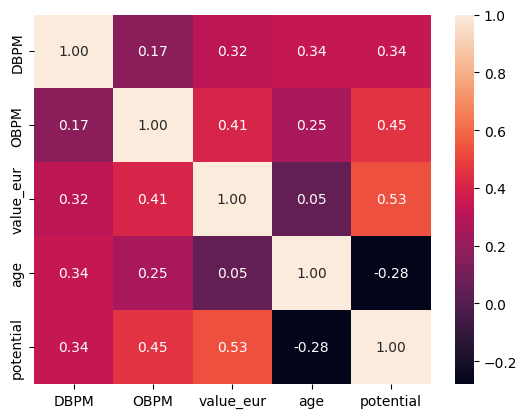

In [ ]:
sns.heatmap(data_short.corr(numeric_only=True), annot=True, fmt=f".2f")

In [ ]:
data_short

,long_name,DBPM,OBPM,player_positions,value_eur,age,potential
9284,Lionel Andrés Messi Cuccittini,62.220,91.640,CF,78000000.0,34.0,93.0
8905,Kylian Mbappé Lottin,73.230,88.710,LW,194000000.0,22.0,95.0
2992,Cristiano Ronaldo dos Santos Aveiro,68.310,88.110,LW,45000000.0,36.0,91.0
11619,Neymar da Silva Santos Júnior,66.015,88.095,CAM,129000000.0,29.0,91.0
8632,Kevin De Bruyne,71.720,87.955,CAM,125500000.0,30.0,91.0
...,...,...,...,...,...,...,...
4519,Ethan Bartlow,56.380,31.320,CB,120000.0,21.0,61.0
15716,Yeon Soo Kim,58.800,31.050,CB,140000.0,27.0,57.0
16124,刘佳燊,59.780,30.610,CB,90000.0,29.0,54.0
14095,Seok-Yeong Cho,53.080,29.980,CB,100000.0,24.0,58.0


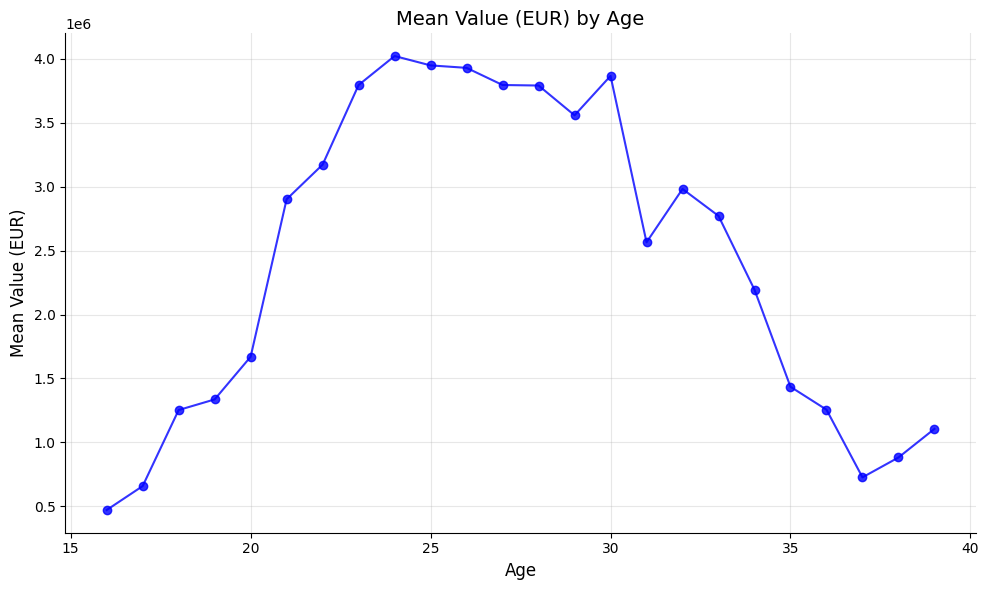

In [ ]:
import matplotlib.pyplot as plt

mean_value_by_age = data_2022.groupby('age')['value_eur'].mean()

plt.figure(figsize=(10, 6))
mean_value_by_age.plot(kind='line', marker='o', color='blue', alpha=0.8)

plt.title('Mean Value (EUR) by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Mean Value (EUR)', fontsize=12)
plt.grid(alpha=0.3)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


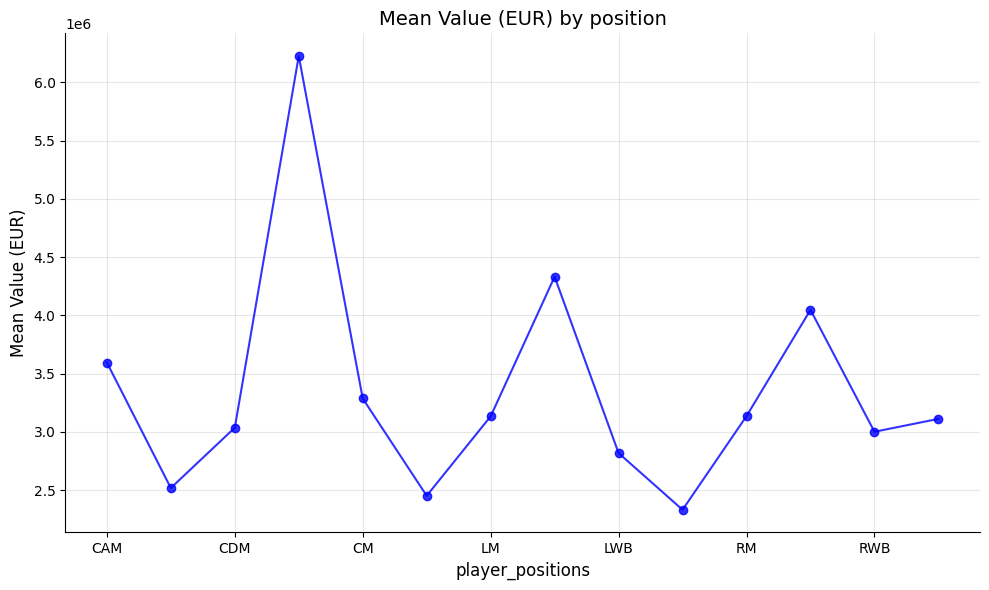

In [ ]:
import matplotlib.pyplot as plt

mean_value_by_age = data_2022.groupby('player_positions')['value_eur'].mean()

plt.figure(figsize=(10, 6))
mean_value_by_age.plot(kind='line', marker='o', color='blue', alpha=0.8)

plt.title('Mean Value (EUR) by position', fontsize=14)
plt.xlabel('player_positions', fontsize=12)
plt.ylabel('Mean Value (EUR)', fontsize=12)
plt.grid(alpha=0.3)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


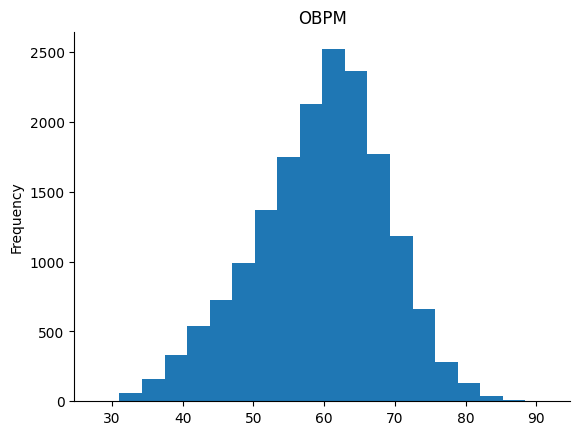

In [ ]:
# @title OBPM

from matplotlib import pyplot as plt
data_short['OBPM'].plot(kind='hist', bins=20, title='OBPM')
plt.gca().spines[['top', 'right',]].set_visible(False)

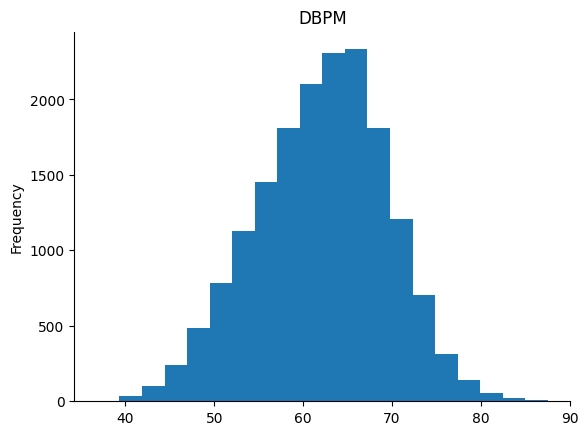

In [ ]:
# @title DBPM

from matplotlib import pyplot as plt
data_short['DBPM'].plot(kind='hist', bins=20, title='DBPM')
plt.gca().spines[['top', 'right',]].set_visible(False)

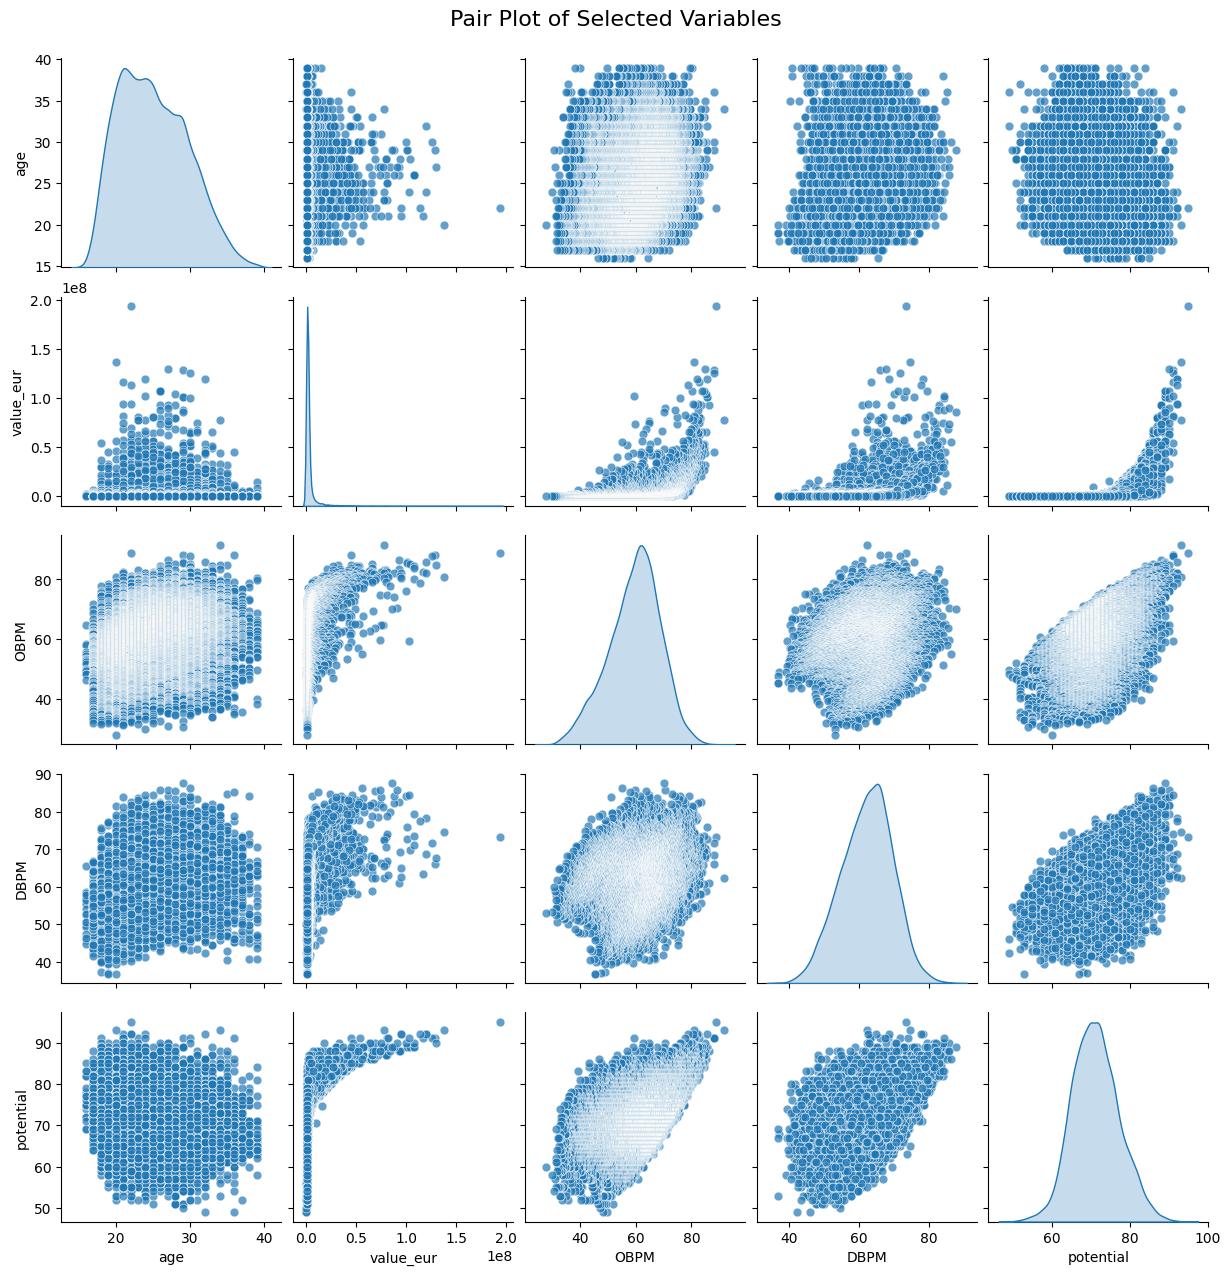

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the desired columns for the pair plot
pairplot_data = data_short[['age', 'value_eur', 'OBPM', 'DBPM', 'potential']]

# Create the pair plot
sns.pairplot(pairplot_data, diag_kind="kde", plot_kws={'alpha': 0.7, 's': 40})

# Add a title
plt.suptitle("Pair Plot of Selected Variables", y=1.02, fontsize=16)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Prepare data
predictors = ['age', 'OBPM', 'DBPM']
target = 'value_eur'

X = data_short[predictors]
y = data_short[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model (example: Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2*100:.2f}%")


R^2 Score: 85.22%


In [ ]:
X_train.head(5)

,age,OBPM,DBPM
1642,27.0,74.855000,68.510000
13166,27.0,69.266667,69.343333
3072,23.0,51.650000,72.420000
810,18.0,41.280000,55.990000
7196,24.0,57.630000,72.920000


In [ ]:
y_train.head(5)

,value_eur
1642,15000000.0
13166,2300000.0
3072,5500000.0
810,190000.0
7196,7000000.0


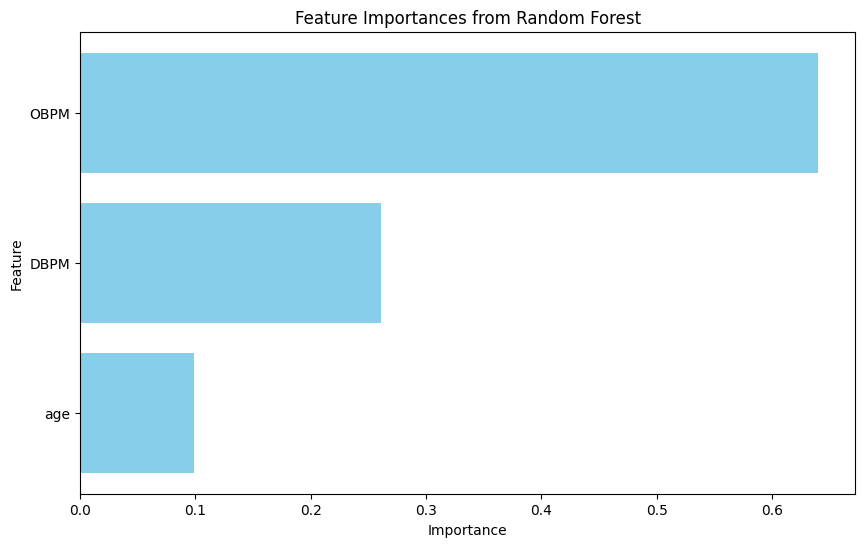

In [ ]:
feature_importances = model.feature_importances_

# Combine feature names with their importances
importance_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


# Plot feature importances (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
data_2023 = data_cleaned[data_cleaned['fifa_version'] == 23]
o_play_attributes = ['pace', 'shooting', 'passing', 'dribbling']
d_play_attributes = ['defending', 'physic', 'pace']

# Initialize dictionaries to store the OBPM and DBPM calculations
obpm_values = []
dbpm_values = []

# Loop through each player (assuming `data_cleaned` contains the player data)
for index, row in data_2023.iterrows():
    # Get the player position (could be multiple positions, so we handle that)
    positions = row['player_positions'].split(', ')  # Assuming multiple positions are stored as a comma-separated string
    player_obpm = 0
    player_dbpm = 0

    # Loop over positions for each player
    for position in positions:
        # Get the OBPM and DBPM weights for the position from the DataFrames (OBPM_N and DBPM_N)
        try:
            position_obpm_weights = OBPM_N.loc[:, position]
            position_dbpm_weights = DBPM_N.loc[:, position]

            # Calculate the weighted sum for OBPM and DBPM
            obpm = np.dot(position_obpm_weights, row[o_play_attributes])  # Weighted sum for OBPM
            dbpm = np.dot(position_dbpm_weights, row[d_play_attributes])  # Weighted sum for DBPM

            # Accumulate the results for the player
            player_obpm += obpm
            player_dbpm += dbpm
        except KeyError:
            continue  # Skip the position if it's not found in OBPM/DBPM weights

    # Store the calculated values for the player
    obpm_values.append(player_obpm)
    dbpm_values.append(player_dbpm)

# Add the calculated OBPM and DBPM values to the dataframe
data_2023['OBPM'] = obpm_values
data_2023['DBPM'] = dbpm_values

In [ ]:
data_short_23 = (
    data_2023[['long_name', 'DBPM', 'OBPM', 'player_positions', 'value_eur', 'age', 'overall', 'potential']]
    .groupby('long_name')
    .agg({
        'DBPM': 'mean',  # Example aggregation - adjust as needed
        'OBPM': 'mean',  # Example aggregation - adjust as needed
        'player_positions': 'first',  # Choose the first position as an example
        'value_eur': 'mean',  # Average value
        'age': 'mean',  # Average age
        'potential': 'mean'  # Average potential
    })
    .reset_index()
    .sort_values(['OBPM', 'DBPM'], ascending=False)
)


In [ ]:
data_short_23['Predicted'] = model.predict(data_short_23[predictors])
r2 = r2_score(data_short_23['value_eur'], data_short_23['Predicted'])
print(f'Accuracy Percentage in predicting 2023 Market Values: {round(r2*100,2)}%')

Accuracy Percentage in predicting 2023 Market Values: 84.88%


In [ ]:
data_short_23['value_eur'] = data_short_23['value_eur'] / 1e6
data_short_23['Predicted'] = data_short_23['Predicted'] / 1e6

In [ ]:
data_short_23[['long_name','DBPM','OBPM','player_positions','value_eur','age']].sort_values('value_eur', ascending=False).head(15)

,long_name,DBPM,OBPM,player_positions,value_eur,age
8694,Kylian Mbappé Lottin,72.865000,89.010,LW,190.5,23.0
4431,Erling Braut Haaland,75.440000,80.900,ST,148.0,21.0
5148,Frenkie de Jong,78.340000,82.410,CM,116.5,25.0
12305,Pedro González López,71.900000,79.970,CM,116.0,19.0
11013,Mohamed Salah Ghaly,72.750000,86.420,RW,115.5,30.0
12398,Philip Foden,66.546667,82.300,CAM,109.5,22.0
15064,Vinícius José Paixão de Oliveira Júnior,70.680000,83.560,LW,109.0,21.0
8428,Kevin De Bruyne,70.860000,87.980,CAM,107.5,31.0
13323,Rúben dos Santos Gato Alves Dias,84.630000,60.200,CB,107.5,25.0
5822,Harry Kane,66.600000,84.320,ST,105.5,28.0


In [ ]:
data_short_23[['long_name','DBPM','OBPM','player_positions','Predicted','age']].sort_values('Predicted', ascending=False).head(15)

,long_name,DBPM,OBPM,player_positions,Predicted,age
8694,Kylian Mbappé Lottin,72.865,89.010,LW,155.005,23.0
8428,Kevin De Bruyne,70.860,87.980,CAM,118.220,31.0
11399,Neymar da Silva Santos Júnior,66.900,87.810,LW,110.195,30.0
4431,Erling Braut Haaland,75.440,80.900,ST,109.695,21.0
11013,Mohamed Salah Ghaly,72.750,86.420,RW,109.565,30.0
16270,손흥민 孙兴慜,71.270,85.805,LM,107.365,29.0
15064,Vinícius José Paixão de Oliveira Júnior,70.680,83.560,LW,99.880,21.0
2702,Christopher Nkunku,72.420,84.420,CAM,99.610,24.0
12253,Paulo Bruno Exequiel Dybala,59.260,85.450,CAM,92.690,28.0
9072,Lionel Andrés Messi Cuccittini,62.530,88.770,RW,90.365,35.0


In [ ]:
data_short_23[['long_name','DBPM','OBPM','player_positions','value_eur','Predicted','age']].sort_values('Predicted', ascending=False)

,long_name,DBPM,OBPM,player_positions,value_eur,Predicted,age
8694,Kylian Mbappé Lottin,72.865,89.01,LW,190.500,155.00500,23.0
8428,Kevin De Bruyne,70.860,87.98,CAM,107.500,118.22000,31.0
11399,Neymar da Silva Santos Júnior,66.900,87.81,LW,99.500,110.19500,30.0
4431,Erling Braut Haaland,75.440,80.90,ST,148.000,109.69500,21.0
11013,Mohamed Salah Ghaly,72.750,86.42,RW,115.500,109.56500,30.0
...,...,...,...,...,...,...,...
16160,霍亮,52.860,37.09,RB,0.030,0.07630,32.0
5830,Harry Nicolson,53.920,33.42,CB,0.100,0.07420,21.0
6646,James McNulty,54.690,42.00,CB,0.035,0.07325,37.0
1737,Ben Collins,53.860,33.49,CB,0.060,0.07270,22.0


In [ ]:
data_short_23[['long_name','DBPM','OBPM','player_positions','value_eur','Predicted','age']].sort_values('Predicted', ascending=False).head(30)[20:]

,long_name,DBPM,OBPM,player_positions,value_eur,Predicted,age
12914,Robert Lewandowski,68.120,85.040,ST,84.0,76.975,33.0
11992,Ousmane Dembélé,66.270,82.570,LW,48.0,76.375,25.0
9115,Lorenzo Pellegrini,76.320,81.345,CAM,55.0,75.920,26.0
2792,Cody Mathès Gakpo,72.330,82.530,LW,52.0,75.450,23.0
5148,Frenkie de Jong,78.340,82.410,CM,116.5,74.795,25.0
15640,Éder Gabriel Militão,85.090,68.780,CB,57.5,73.625,24.0
1876,Bernardo Mota Veiga de Carvalho e Silva,67.215,84.265,CAM,97.5,72.650,27.0
13544,Sandro Tonali,80.340,79.070,CDM,62.5,72.395,22.0
5822,Harry Kane,66.600,84.320,ST,105.5,72.235,28.0
11548,Nicolò Barella,78.760,81.980,CM,89.5,72.105,25.0


In [ ]:
import plotly.express as px

# Plot side-by-side bars
fig = px.bar(
    data_short_23.sort_values('Predicted', ascending=False).head(10),
    x='long_name',
    y=['value_eur', 'Predicted'],
    barmode='group',  # Grouped bar mode
    labels={'long_name': 'Player Name', 'value_eur': 'Value (M)', 'Predicted': 'Predicted Value (M)'},
    title="Comparison of Actual and Predicted Values"
)

fig.update_layout(
    xaxis_title="Player Name",
    yaxis_title="Value in Millions (USD)",
    legend_title="Metrics",
    bargap=0.15  # Adjust spacing between groups
)

fig.show()


In [ ]:
import plotly.express as px

# Plot side-by-side bars
fig = px.bar(
    data_short_23.sort_values('value_eur', ascending=False).head(10),
    x='long_name',
    y=['value_eur', 'Predicted'],
    barmode='group',  # Grouped bar mode
    labels={'long_name': 'Player Name', 'value_eur': 'Value (M)', 'Predicted': 'Predicted Value (M)'},
    title="Comparison of Actual and Predicted Values"
)

fig.update_layout(
    xaxis_title="Player Name",
    yaxis_title="Value in Millions (USD)",
    legend_title="Metrics",
    bargap=0.15  # Adjust spacing between groups
)

fig.show()


In [ ]:
data_short_23

,long_name,DBPM,OBPM,player_positions,value_eur,age,potential,Predicted
8694,Kylian Mbappé Lottin,72.865,89.01,LW,190.50,23.0,95.0,155.00500
9072,Lionel Andrés Messi Cuccittini,62.530,88.77,RW,54.00,35.0,91.0,90.36500
8428,Kevin De Bruyne,70.860,87.98,CAM,107.50,31.0,91.0,118.22000
11399,Neymar da Silva Santos Júnior,66.900,87.81,LW,99.50,30.0,89.0,110.19500
11013,Mohamed Salah Ghaly,72.750,86.42,RW,115.50,30.0,90.0,109.56500
...,...,...,...,...,...,...,...,...
6082,Ibrahim Jamal,50.200,31.20,CB,0.10,19.0,62.0,0.11050
10935,Min Gyu Kim,57.170,31.17,CB,0.17,22.0,61.0,0.21945
13421,Sam O'Brien,51.000,30.50,CB,0.07,20.0,55.0,0.11380
2855,Conor Tourish,54.820,30.36,CB,0.14,27.0,58.0,0.09460


In [ ]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(data_short_23['value_eur'], data_short_23['Predicted'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.001:
    print("There is a significant difference between the actual and predicted values (reject null hypothesis).")
else:
    print("There is no significant difference between the actual and predicted values (fail to reject null hypothesis).")


T-statistic: -3.0258
P-value: 0.0025
There is no significant difference between the actual and predicted values (fail to reject null hypothesis).


In [ ]:
data_short_23['Error_Percent'] = ((data_short_23['Predicted'] - data_short_23['value_eur']) / data_short_23['value_eur']) * 100
from sklearn.preprocessing import MinMaxScaler
print(len(data_short_23))

scaler = MinMaxScaler()
data_short_23['Error_Percent_Scaled'] = scaler.fit_transform(data_short_23[['Error_Percent']])*100
px.histogram(data_short_23,x='Error_Percent_Scaled')

16378


In [ ]:
mean_value_per_year = data_short_23['Predicted'].mean()
data_short_23['Predicted_norm'] = data_short_23['Predicted'] / mean_value_per_year + 50

# Display the dataset with the new normalized column
data_short_23[['age', 'value_eur', 'Predicted_norm', 'Predicted']].head()


,age,value_eur,Predicted_norm,Predicted
8694,23.0,190.5,101.011813,155.005
9072,35.0,54.0,79.738928,90.365
8428,31.0,107.5,88.905948,118.220
11399,30.0,99.5,86.264938,110.195
11013,30.0,115.5,86.057607,109.565


In [ ]:
data_short_23['Error_Percent_Norm'] = ((data_short_23['Predicted'] - data_short_23['Predicted_norm']) / data_short_23['Predicted_norm']) * 100
from sklearn.preprocessing import MinMaxScaler
print(len(data_short_23))

scaler = MinMaxScaler()
data_short_23['Error_Percent_Norm_Scaled'] = scaler.fit_transform(data_short_23[['Error_Percent_Norm']])*100
px.histogram(data_short_23,x='Error_Percent_Norm_Scaled')

16378


In [ ]:
import plotly.express as px

# Plot side-by-side bars
fig = px.bar(
    data_short_23.sort_values('Predicted_norm', ascending=False).head(10),
    x='long_name',
    y=['value_eur', 'Predicted_norm'],
    barmode='group',  # Grouped bar mode
    labels={'long_name': 'Player Name', 'value_eur': 'Value (M)', 'Predicted_norm': 'Predicted Value (M)'},
    title="Comparison of Actual and Predicted Values"
)

fig.update_layout(
    xaxis_title="Player Name",
    yaxis_title="Value in Millions (USD)",
    legend_title="Metrics",
    bargap=0.15  # Adjust spacing between groups
)

fig.show()